<a href="https://colab.research.google.com/github/Andytrueno/datamuestra/blob/main/Ventas_Farmacia_Domingos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [36]:
data = pd.read_csv("/content/drive/MyDrive/ventafarmacia.csv",sep=";")
data.head()

,ds,y
0,2022-01-04,681.7
1,2022-01-05,245.5
2,2022-01-06,323.0
3,2022-01-07,96.5
4,2022-01-08,161.5


In [37]:
data.describe()

,y
count,75.000000
mean,202.773333
std,127.600379
min,0.000000
25%,116.750000
50%,204.500000
75%,285.150000
max,681.700000


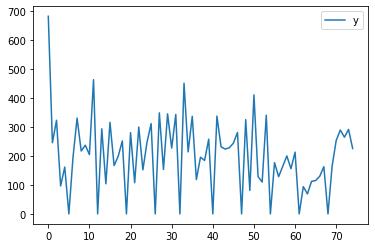

In [45]:
data.plot()

In [39]:
m = Prophet() 
m.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
m = Prophet(interval_width=0.95)
model = m.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
future = m.make_future_dataframe(periods=10,freq='D')
forecast = m.predict(future)
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
75,2022-03-20,152.225948,-230.545445,127.650332,152.225948,152.225948,-201.328600,-201.328600,-201.328600,-201.328600,-201.328600,-201.328600,0.0,0.0,0.0,-49.102652
76,2022-03-21,150.949888,12.458402,370.224387,150.949887,150.949888,42.776995,42.776995,42.776995,42.776995,42.776995,42.776995,0.0,0.0,0.0,193.726883
77,2022-03-22,149.673828,1.765707,359.206552,149.673827,149.673829,21.951833,21.951833,21.951833,21.951833,21.951833,21.951833,0.0,0.0,0.0,171.625661
78,2022-03-23,148.397768,23.645760,372.718086,148.397767,148.397769,47.269031,47.269031,47.269031,47.269031,47.269031,47.269031,0.0,0.0,0.0,195.666799
79,2022-03-24,147.121708,-17.490601,316.622952,147.121707,147.121710,2.714100,2.714100,2.714100,2.714100,2.714100,2.714100,0.0,0.0,0.0,149.835809
80,2022-03-25,145.845649,-35.038994,326.346281,145.845647,145.845650,1.200716,1.200716,1.200716,1.200716,1.200716,1.200716,0.0,0.0,0.0,147.046365
81,2022-03-26,144.569589,58.385426,406.041648,144.569586,144.569591,85.415925,85.415925,85.415925,85.415925,85.415925,85.415925,0.0,0.0,0.0,229.985514
82,2022-03-27,143.293529,-234.147315,115.537846,143.293526,143.293532,-201.328600,-201.328600,-201.328600,-201.328600,-201.328600,-201.328600,0.0,0.0,0.0,-58.035071
83,2022-03-28,142.017469,14.063707,356.321689,142.017466,142.017472,42.776995,42.776995,42.776995,42.776995,42.776995,42.776995,0.0,0.0,0.0,184.794464
84,2022-03-29,140.741409,-26.075029,326.425000,140.741405,140.741413,21.951833,21.951833,21.951833,21.951833,21.951833,21.951833,0.0,0.0,0.0,162.693242


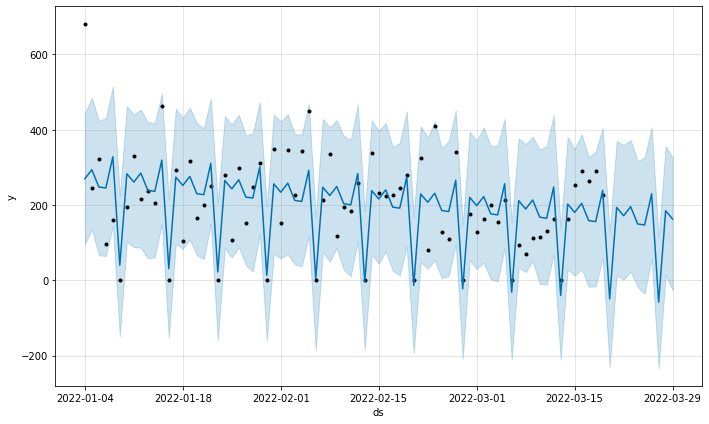

In [46]:
plot1 = m.plot(forecast)

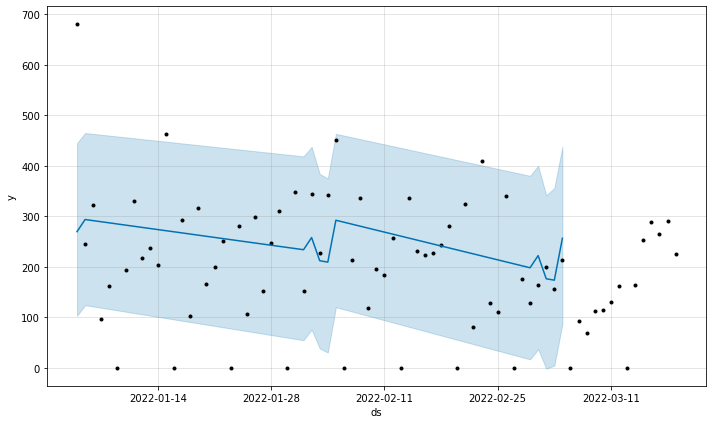

In [43]:
future2 = future.copy()
future2 = future2[future2['ds'].dt.day < 6]
fcst = m.predict(future2)
fig = m.plot(fcst)

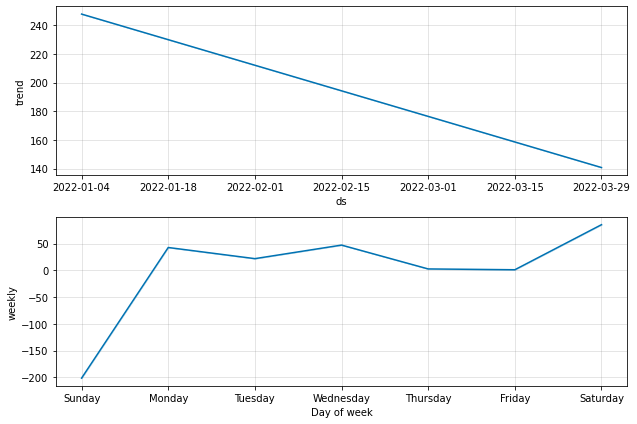

In [44]:
plt2 = m.plot_components(forecast)